<a href="https://colab.research.google.com/github/swethag04/llm/blob/main/Q%26A/Research_QandA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research paper Q&A App using Retrieval Augmented Generation (RAG)

**Goal** : <br>
The goal of the project is to build a Question and Answer system app powered by Large Language Models (LLM) that will answer any specific question from a research paper the user uploads on the app.

I will be testing 2 different embedding models as well as 2 different LLMs to compare their performances to identify the best model to use for the app.
<br><br>

**Data Problem**: <br>
The data task is to use Retreival Augment Generation  technique to provide additional context to LLM to answer a question. <br><br>


**Data Required**: <br>
Digital copies of research papers in pdf format
<br><br>

**How to source the data?** <br>
The data can be sourced by scraping the internet for popular research papers
<br><br>

**Expected Results:** <br>
The app should reliably and correctly answer the questions using the information from the specific document.
<br><br>


### Technology and Tools Used


1. **Large Language Models (LLMs)**<br>
    
> LLMs are deep learning models that are pre-trained on vast amounts of data and can be used for tasks like generating text, summarizing, translating, answering questions etc.

2.   **Retrieval Augmented Generation (RAG)**

> RAG is a technique that enhances the capabilties of LLMs by incorporating information retrieval into the text generation process. This is done by retrieving  data/documents relevant to a question or task and providing them as context for the LLM.

3. **LlamaIndex**

> LlamaIndex is an open source data framework for building RAG systems.

4. **Streamlit**

> Streamlit is an open source python library used to create custom web apps for ML



###Installing relevant packages

In [4]:
#!pip install openai
#!pip install tiktoken
#!pip install cohere
#!pip install llama-index==0.8.69.post1
#!pip install pypdf
#!pip install ragas==0.0.20
#!pip install sentence-transformers
#!pip install -q "huggingface_hub[inference]"

###Setting up API Keys

In [5]:
from secret_key import openapi_key, hugging_face_key
import os
import openai

os.environ["OPENAI_API_KEY"] = openapi_key
openai.api_key = os.getenv("OPENAI_API_KEY")

os.environ["HUGGINGFACE_API_KEY"] = hugging_face_key

### Importing Packages

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext, OpenAIEmbedding
from llama_index.llms import OpenAI
from langchain.embeddings import HuggingFaceEmbeddings

import nest_asyncio

nest_asyncio.apply()

### Building RAG
Following are the different steps required to build a RAG system.



1.   **Loading**:
Load the document and create text chunks to divide longer texts into smaller chunks , so as to not exceed the context widow of LLMs
2. **Indexing**:
Create embeddings of the text chunks (Two semantically related texts will be in proximity in the vector space while dissimilar texts are far away)
3.  **Storing**:
Store embeddings and associated metadata in vector databases with indexing for fast search and retrieval
4.   **Querying**:
Retrieve relevant context from an index when given a user query.
5.   **Response Synthesis**:
 Combine the user query, top k results from the search (similarity search) and the prompt to send as input to the LLM which generates the final response to the user query
6.   **Evaluation**:
Evaluate the response generated for accuracy and relevancy


Llama Index provides an easy framework for implementing the above steps to build a RAG system.


### Loading the data file
The data file used here is the following research paper :
PaLM: Scaling Language Modeling with Pathways  (https://arxiv.org/abs/2204.02311)  [link text](https://)

In [10]:
# Load the document
reader = SimpleDirectoryReader(input_files = ['/content/sample_data/palm.pdf'])
docs = reader.load_data()

###Data Overview

In [9]:
print(f"Loaded {len(docs)} docs")

Loaded 87 docs


The research paper loaded here has 87 pages

In [59]:
#print(docs)

In [16]:
# First page
print(docs[0])

Doc ID: ab60dd3d-987d-4b19-b60f-3f8b53a96bc8
Text: PaLM: Scaling Language Modeling with Pathways Aakanksha
Chowdhery∗Sharan Narang∗Jacob Devlin∗ Maarten Bosma Gaurav Mishra Adam
Roberts Paul Barham Hyung Won Chung Charles Sutton Sebastian Gehrmann
Parker Schuh Kensen Shi Sasha Tsvyashchenko Joshua Maynez Abhishek
Rao†Parker Barnes Yi Tay Noam Shazeer‡Vinodkumar Prabhakaran Emily
Reif Nan Du Ben ...


In [22]:
# Metadata of page 1
print(docs[0].metadata)

{'page_label': '1', 'file_name': 'palm.pdf', 'file_path': '/content/sample_data/palm.pdf', 'creation_date': '2023-12-13', 'last_modified_date': '2023-12-13', 'last_accessed_date': '2023-12-13'}


In [17]:
#Last page
print(docs[-1])

Doc ID: fe1e71de-edb3-4f4d-bcca-8dc5bd32bdf2
Text: 1-shot Finetuning TaskPaLM 8BPaLM 62BPaLM 540BT5 XXLPaLM 8BPaLM
62BPaLM 540B Data-To-Text Czech Restaurant (cs) 35 .18 52 .93 61.44
51.80 75.85 75.13 74 .37 E2E (en) 60 .82 67 .92 69.72 76.44 76.46
76.01 75 .83 WebNLG (en) 57 .29 68 .95 73.94 71.25 75 .82 76 .65 76.80
WebNLG (ru) 38 .97 55 .31 66.53 29.76 77 .49 79.19 78.01 Summarization
MLSum (...


### Data Preprocessing - Chunking and Indexing
Preprocessing step includes splitting the docs loaded into smaller chunks and build index from the documents.

The chunk size used here is 512

In [24]:
# Create an index from the document
index = VectorStoreIndex.from_documents(docs,
                                        service_context=ServiceContext.from_defaults(chunk_size=512))

[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
#Create a query engine from the index
query_engine = index.as_query_engine()


In [26]:
# Ask a question
response = query_engine.query("What hardware was used to train PaLM?")
print(response)

TPU v4 was used to train PaLM.


In [27]:
response2 = query_engine.query("What are the etical considerations related to large language models?")
print(response2)

The ethical considerations related to large language models include the potential for biases and the risks of malicious use. Biases in language models can have harmful effects, and there is a lack of standardization in fairness benchmarks and understanding of the harms related to bias measures. Additionally, the use of large language models for malicious purposes, such as misinformation campaigns or targeted harassment, is a concern. It is important to pursue scalable solutions to guard against these risks and ensure responsible deployment of language models.


The above RAG system works fine and provides  relevant answers for the queries asked from the research paper provided.

### Evaluation
In order to quantitatively evaluate the RAG system, Ragas python package can be used.
 Ragas offers metrics for evaluating both the  Retrieval and the Generation components of the RAG.
####Generation Metrics


1.   **Faithfulness**


*   Measures factual consitency of generated answer against the given context
*   Generated answer is regarded as faithful if all the claims that are made in the answer can be inferred from the given context
* Faithfulness score = (# claims that can be inferred from given context)/(Total# of claims in the generated answer)


        
2.   **Answer Relevancy**
* Measures how relevant the generated answer is to the question
* Lower score is assigned to answers that are incomplete or contain redundant info
* To calculate this score, LLM is prompted to generate an appropriate question for the generated answer multiple times and the mean cosine similarity between these generated questions and the original question is measured. The underlying idea is that if the generated answer accurately addresses the initial question, the LLM should be able to genrate questions from the answer that align with the original question.

<br>


####Retrieval Metrics


1.   **Context Relevancy**

*   This metric gauges the relavancy of the retrieved context, calculated based on both the questions and contexts
*   context relevancy = # sentences in retrieved context that are relevant for answering the given question/total # sentences in retrieved context


2.  **Context Precision**



*   Metric that evaluates whether all of the ground truth relevant items present in the contexts are ranked higher or not

### Synthetic test dataset
The first step in using Ragas is to generate a synthetic test dataset that can be used to evaluate RAG.
Ragas uses LLMs to generate the test questions, where questions with different characteristics such as reasoning, conditioning, multi context etc are created from the provided set of documents.

In [ ]:
# Creating a synthetic test dataset of 10 questions for evaluation
testsetgenerator = TestsetGenerator.from_default()
test_size = 10
testset = testsetgenerator.generate(docs, test_size=test_size)
test_df = testset.to_pandas()
test_df.head()


100%|██████████| 10/10 [15:22<00:00, 108.31s/it]
15it [16:32, 62.06s/it]                         
21it [17:17, 37.16s/it]
28it [28:50, 63.87s/it]
36it [30:15, 41.86s/it]
45it [31:03, 27.27s/it]
55it [33:18, 21.94s/it]

,question,context,answer,question_type,episode_done
0,What are the limitations of fairness evaluatio...,- A major limitation of the fairness analyses ...,The limitations of fairness evaluations in Eng...,simple,True
1,What is the performance trend for the PaLM mod...,- We can see in Figure 5 that performance on g...,The performance trend for the PaLM model on go...,simple,True
2,What impact does model size have on the rate o...,- Figure 18(b) shows the memorization rate as ...,The impact of model size on the rate of memori...,multi_context,True
3,"Which model outperforms GPT-3, Gopher, and Chi...",- The three models evaluated on 58 tasks in co...,"PaLM 540B 5-shot outperforms GPT-3, Gopher, an...",multi_context,True
4,What types of data are included in the PaLM pr...,- The dataset is a mixture of ﬁltered webpages...,The types of data included in the PaLM pretrai...,simple,True


In [ ]:
# Save the test questons generated to a pkl file
test_df.to_pickle('/content/sample_data/testdf.pkl')

In [28]:
test_df = pd.read_pickle('/content/sample_data/testdf.pkl')

Text(0.5, 1.0, 'Test Question type Distribution')

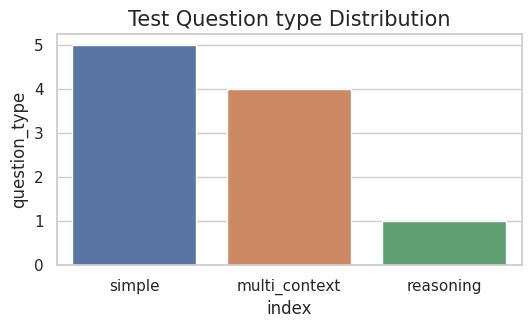

In [30]:
# Question type distribution

import seaborn as sns
sns.set(rc={'figure.figsize':(6,3)})

test_data_dist = test_df.question_type.value_counts().to_frame().reset_index()
sns.set_theme(style = "whitegrid")
g = sns.barplot(y = 'question_type', x='index', data=test_data_dist)
g.set_title("Test Question type Distribution", fontdict = {'fontsize':15})

The synthetic test dataset has 5 simple questions, 4 multi context questions and 1 reasoning question.

In [41]:
# collect questions and answers
test_questions = test_df['question'].values.tolist()
test_answers = [[item] for item in test_df['answer'].values.tolist()]

In [42]:
test_questions

['What are the limitations of fairness evaluations in English language technologies?',
 'What is the performance trend for the PaLM model on goal step wikihow and logical args tasks?',
 'What impact does model size have on the rate of memorization of training examples, taking into account occurrence proportion in training data and corpus breakdown?',
 'Which model outperforms GPT-3, Gopher, and Chinchilla on the 58 tasks in the PaLM models on BIG-bench?',
 'What types of data are included in the PaLM pretraining dataset?',
 'What are the occupations that co-occur most frequently with gender pronouns?',
 'What is a critical open scaling question when comparing parameter models trained with varying token numbers, considering model depth and width, training corpus quality, and increased model capacity without increased compute?',
 'What is the relationship between parameter count and model scale in the PaLM model? How does parameter count change when model scale increases from 8B to 62B?'

In [43]:
test_answers

[['The limitations of fairness evaluations in English language technologies include the fact that they are only performed on English language data. This means that bias benchmarks and evaluations developed for the Western world may not be applicable to other languages and socio-cultural contexts. There is also a lack of standardization of fairness benchmarks, an understanding of the harms related to different bias measures in NLP, and comprehensive coverage of identities. The evaluations are also limited by potential risks that cannot be measured, and bias can vary depending on the specific downstream application and training pipeline. It is unclear if evaluations on pre-trained language models affect downstream task evaluations after fine-tuning. Therefore, it is recommended to assess fairness gaps in the application context before deployment.'],
 ['The performance trend for the PaLM model on goal step wikihow and logical args tasks is a log-linear scaling curve, with the PaLM 540B mo

We now have a set of 10 test questions and answers that will be used to evaluate the RAG system using ragas metrics.


### Compare Embeddings for Retriever
The performance of the retriever is an important factor that determines the effectiveness of a RAG system, specifically the quality of embeddings. Here I compare the performance of two different embeddings.


1.   OpenAI Embeddings
2.   [BAAI (Beijing Academy of Artificial Intelligence) General Embeddings (BGE)](https://huggingface.co/BAAI/bge-small-en-v1.5)

Since the evaluation is for the embeddings, the relevant metrics to use here are context precision and context recall.


In [31]:
# Build RAG

def build_query_engine(embed_model):

    # Split the documents into nodes and create vector embeddings of the text of every node
    vector_index = VectorStoreIndex.from_documents( docs, service_context=ServiceContext.from_defaults(chunk_size=512),
        embed_model=embed_model,
    )
    #
    query_engine = vector_index.as_query_engine(similarity_top_k=2)
    return query_engine

In [32]:
# Import metrics from ragas to evaluate retriever component

from ragas.metrics import (
    context_precision,
    context_recall,
)

metrics = [
    context_precision,
    context_recall,
]

### Evaluate OpenAI Embeddings

In [ ]:
from ragas.llama_index import evaluate

openai_model = OpenAIEmbedding()
query_engine1 = build_query_engine(openai_model)
result_openai = evaluate(query_engine1, metrics, test_questions, test_answers)


[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


evaluating with [context_precision]


100%|██████████| 1/1 [00:13<00:00, 13.33s/it]


evaluating with [context_recall]


100%|██████████| 1/1 [01:41<00:00, 101.33s/it]


In [ ]:
print(result_openai)


{'context_precision': 0.9500, 'context_recall': 0.6067}


In [ ]:

print("Ragas score: ", statistics.harmonic_mean(list(result_openai.values())))

Ragas score:  0.7404710920603806


### Evaluate Bge Embeddings

In [ ]:

flag_model = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5")
query_engine2 = build_query_engine(flag_model)
result_bge = evaluate(query_engine2, metrics, test_questions, test_answers)

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

evaluating with [context_precision]


100%|██████████| 1/1 [00:11<00:00, 11.48s/it]


evaluating with [context_recall]


100%|██████████| 1/1 [01:34<00:00, 94.74s/it]


In [ ]:
print(result_bge)

{'context_precision': 0.9500, 'context_recall': 0.7067}


In [ ]:
print("Ragas score: ", statistics.harmonic_mean(list(result_openai.values())))

Ragas score:  0.7404710920603806


### Compare scores of openAI vs Bge embedding models

Based on the evaluation results, `context_precision` and `context_recall` metrics of the OpenAI model are the same as Bge embedding model in my RAG pipeline when applied to my own dataset.

Since there is no difference in performance, we can use either of the two embedding model for building the app.

### Compare LLMs using Ragas Evaluations
The LLM used in the RAG system also has a large impact in the quality of the generated output.

Here, I will be comparing and evaluating the following 2 different LLMs:

1.   [zephyr-7b-alpha](https://huggingface.co/HuggingFaceH4/zephyr-7b-alpha/)
2.   [Falcon-7b-instruct](https://huggingface.co/tiiuae/falcon-7b-instruct)



In [33]:
from llama_index.llms import HuggingFaceInferenceAPI
from llama_index.embeddings import HuggingFaceInferenceAPIEmbedding

def build_qe(llm):
  vector_index = VectorStoreIndex.from_documents(
        docs, service_context=ServiceContext.from_defaults(chunk_size=512, llm=llm),
        embed_model=HuggingFaceInferenceAPIEmbedding,
    )

  qe = vector_index.as_query_engine(similarity_top_k=2)
  return qe

In [34]:
# Function to evaluate as Llama index does not support async evaluation for HFInference API
from datasets import Dataset

def generate_responses(query_engine, test_questions, test_answers):
  responses = [query_engine.query(q) for q in test_questions]

  answers = []
  contexts = []
  for r in responses:
    answers.append(r.response)
    contexts.append([c.node.get_content() for c in r.source_nodes])
  dataset_dict = {
        "question": test_questions,
        "answer": answers,
        "contexts": contexts,
  }
  if test_answers is not None:
    dataset_dict["ground_truths"] = test_answers
  ds = Dataset.from_dict(dataset_dict)
  return ds

In [39]:
# Import metrics from ragas to evaluate generator component
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness
)

metrics = [
    faithfulness,
    answer_relevancy,
    answer_correctness
]

### Evaluate Zephyr7B Alpha LLM

In [45]:
# Use zephyr model using HFInference API
zephyr_llm = HuggingFaceInferenceAPI(
    model_name="HuggingFaceH4/zephyr-7b-alpha",
    token=""
)
qe1 = build_qe(zephyr_llm)
result_ds = generate_responses(qe1, test_questions, test_answers)
print(result_ds)


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 10
})


In [46]:
from ragas import evaluate
result_zephyr = evaluate(result_ds, metrics=metrics )
print(result_zephyr)

evaluating with [faithfulness]


100%|██████████| 1/1 [00:26<00:00, 26.20s/it]


evaluating with [answer_relevancy]


100%|██████████| 1/1 [00:07<00:00,  7.55s/it]


evaluating with [answer_correctness]


100%|██████████| 1/1 [00:29<00:00, 29.06s/it]


{'faithfulness': 0.9500, 'answer_relevancy': 0.9366, 'answer_correctness': 0.7967}


In [49]:

print("Ragas score: ", statistics.harmonic_mean(list(result_zephyr.values())))

Ragas score:  0.8887532444222976


In [55]:
result_zephyr_df = result_zephyr.to_pandas()
result_zephyr_df.head()

,question,contexts,answer,ground_truths,faithfulness,answer_relevancy,answer_correctness
0,What are the limitations of fairness evaluatio...,[We thus\nnote that potential biases exist bey...,\n\nThe limitations of fairness evaluations in...,[The limitations of fairness evaluations in En...,1.0,0.998211,1.000000
1,What is the performance trend for the PaLM mod...,[Example:\nInput : Which of the following list...,\n\nThe performance on goal step wikihow and l...,[The performance trend for the PaLM model on g...,1.0,0.938808,0.833333
2,What impact does model size have on the rate o...,[8b 62b 540b\nModel Scale0%1%2%3%4%Proportion ...,\n\nLarger models have a higher rate of memori...,[The impact of model size on the rate of memor...,1.0,0.916116,0.800000
3,"Which model outperforms GPT-3, Gopher, and Chi...",[The “best” human performance was computed usi...,"5-shot PaLM 540B outperforms both GPT-3, Gophe...","[PaLM 540B 5-shot outperforms GPT-3, Gopher, a...",1.0,1.000000,1.000000
4,What types of data are included in the PaLM pr...,[3 Training Dataset\nThe PaLM pretraining data...,\n\nThe PaLM pretraining dataset consists of a...,[The types of data included in the PaLM pretra...,1.0,0.913720,0.750000


### Evaluate Falcon-7B-Instruct LLM

In [50]:
falcon_llm = HuggingFaceInferenceAPI(
    model_name="tiiuae/falcon-7b-instruct",
    token=""
)
qe2 = build_query_engine(falcon_llm)
result_ds_falcon = generate_responses(qe2, test_questions, test_answers)
result_falcon = evaluate(result_ds_falcon, metrics=metrics)

result_falcon


evaluating with [faithfulness]


100%|██████████| 1/1 [00:26<00:00, 26.84s/it]


evaluating with [answer_relevancy]


100%|██████████| 1/1 [00:06<00:00,  6.92s/it]


evaluating with [answer_correctness]


100%|██████████| 1/1 [00:23<00:00, 23.57s/it]


{'faithfulness': 0.8417, 'answer_relevancy': 0.9616, 'answer_correctness': 0.7842}

In [51]:
print("Ragas score: ", statistics.harmonic_mean(list(result_falcon.values())))

Ragas score:  0.8563449685299591


In [57]:
result_falcon_df = result_falcon.to_pandas()
result_falcon_df.head()

,question,contexts,answer,ground_truths,faithfulness,answer_relevancy,answer_correctness
0,What are the limitations of fairness evaluatio...,[We thus\nnote that potential biases exist bey...,The limitations of fairness evaluations in Eng...,[The limitations of fairness evaluations in En...,1.000000,0.998212,0.833333
1,What is the performance trend for the PaLM mod...,[Example:\nInput : Which of the following list...,The performance trend for the PaLM model on th...,[The performance trend for the PaLM model on g...,0.500000,0.997688,0.750000
2,What impact does model size have on the rate o...,[8b 62b 540b\nModel Scale0%1%2%3%4%Proportion ...,Larger models have a higher rate of memorizati...,[The impact of model size on the rate of memor...,1.000000,0.899777,0.833333
3,"Which model outperforms GPT-3, Gopher, and Chi...",[The “best” human performance was computed usi...,"PaLM outperforms GPT-3, Gopher, and Chinchilla...","[PaLM 540B 5-shot outperforms GPT-3, Gopher, a...",0.666667,0.939537,0.666667
4,What types of data are included in the PaLM pr...,[3 Training Dataset\nThe PaLM pretraining data...,The PaLM pretraining dataset includes a mixtur...,[The types of data included in the PaLM pretra...,1.000000,1.000000,1.000000


####Compare scores

In [52]:
def analysis(zephyr_df, falcon_df):
  sns.set_style("whitegrid")
  fig, axs = plt.subplots(1,3, figsize=(12, 5))
  for i,col in enumerate(zephyr_df.columns):
    sns.kdeplot(data=[zephyr_df[col].values,falcon_df[col].values],legend=False,ax=axs[i],fill=True)
    axs[i].set_title(f'{col} scores distribution')
    axs[i].legend(labels=["zephyr", "falcon"])
  plt.tight_layout()
  plt.show()

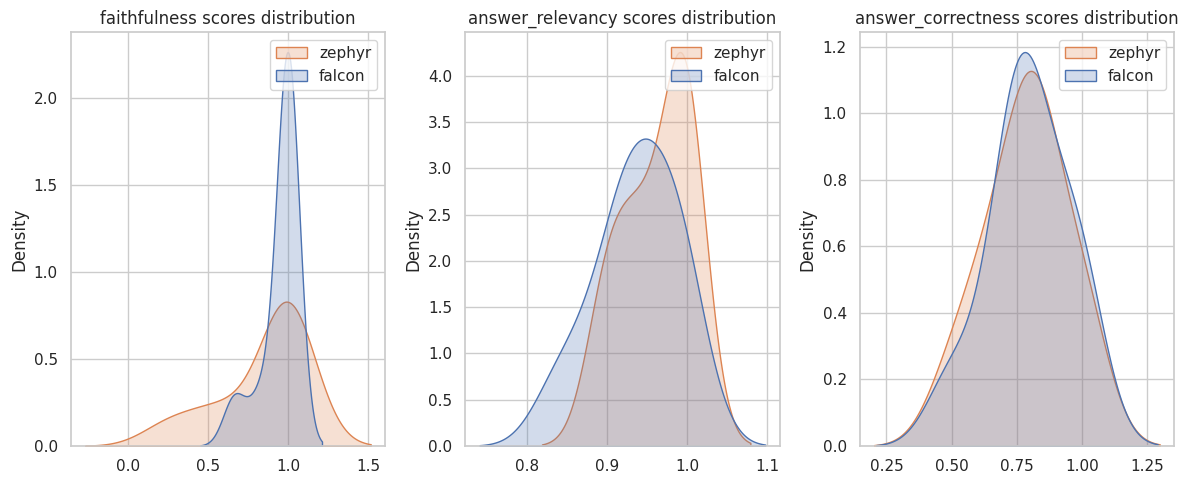

In [58]:
analysis(
    result_zephyr_df[['faithfulness', 'answer_relevancy', 'answer_correctness']],
    result_falcon_df[['faithfulness', 'answer_relevancy', 'answer_correctness']]
)

Based on the evaluation results,

 Ragas Score for Zephyr model = 0.8887 <br>
 Ragas Score for Falcon model = 0.8563

The Zephyr model seems to slightly outperform the Falcon model in my RAG pipeline when applied to my own dataset and hence might be a better choice to use for the Q&A App



###Future Work
1. Compare different chunk sizes to see how it impacts the model performance
2. Increase test data size to see how that impacts the metrics
3. Consider evalutaing  using other metrics like BEIR to evaluate retreival